In [571]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [572]:
datafile = r'C:\Users\joseph\Downloads\btc_all.csv'
data = pd.read_csv(datafile)

In [573]:
data = data.drop('diff_B', axis=1)

In [574]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
date        731 non-null object
trans       731 non-null int64
volatil     731 non-null float64
bidask      731 non-null float64
price       731 non-null float64
volume      731 non-null float64
transpm     731 non-null float64
goog_idx    731 non-null float64
epu_idx     731 non-null float64
exp.sem     719 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 54.3+ KB


In [575]:
#data['diff_B'] = data['diff_B'].str.replace(',', '')

In [576]:
#data['diff_B'] = pd.to_numeric(data['diff_B'])

In [577]:
data['exp.sem'] = data['exp.sem'].fillna(0)

In [578]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
date        731 non-null object
trans       731 non-null int64
volatil     731 non-null float64
bidask      731 non-null float64
price       731 non-null float64
volume      731 non-null float64
transpm     731 non-null float64
goog_idx    731 non-null float64
epu_idx     731 non-null float64
exp.sem     731 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 54.3+ KB


In [579]:
def adf(x):
    for c in x.columns[1:]:
        adf_x = adfuller(x[c])
        if adf_x[1] <= 0.05:
            print (c, "Stationary")
        else:
            print (c, "Non Stationary")

In [580]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

In [581]:
adf(data)

('trans', 'Non Stationary')
('volatil', 'Non Stationary')
('bidask', 'Non Stationary')
('price', 'Non Stationary')
('volume', 'Non Stationary')
('transpm', 'Non Stationary')
('goog_idx', 'Non Stationary')
('epu_idx', 'Stationary')
('exp.sem', 'Stationary')


In [582]:
import matplotlib.pyplot as plt
def stationary(x):
    plt.plot(x)
    plt.show()
    print (adfuller(x))

Raw Data


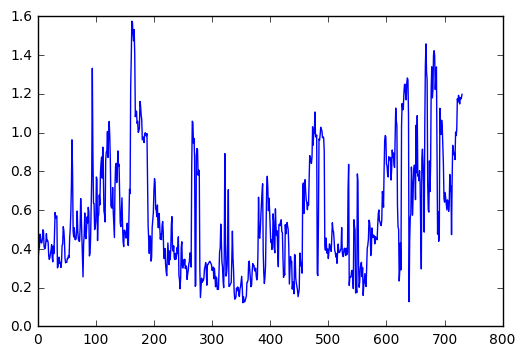

(-2.5680312366307683, 0.099786191279418346, 15, 715, {'5%': -2.8655907692307694, '1%': -3.4395289262948894, '10%': -2.5689271030368235}, -778.22405085349919)


In [583]:
x = data['bidask']
y = difference(x)
print 'Raw Data'
stationary(x)

1 Step Differenced


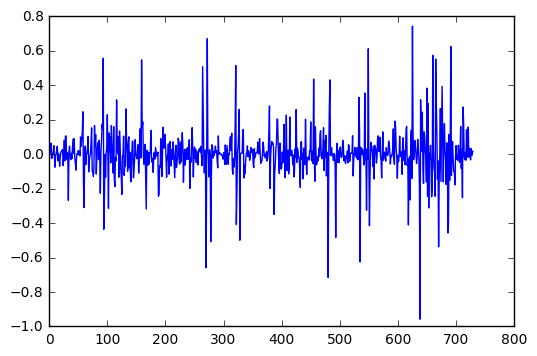

(-11.167045278824501, 2.6980668298458115e-20, 13, 716, {'5%': -2.8655850998755263, '1%': -3.4395160601649919, '10%': -2.5689240826597173}, -771.82469170436298)


In [584]:
print '1 Step Differenced'
stationary(y)

In [585]:
#data['trans'] = difference(data['trans'])

In [586]:
#data['diff_B'] = difference(data['diff_B'])
data['trans'] = difference(data['trans'])
data['volatil'] = difference(data['volatil'])
data['bidask'] = difference(data['bidask'])
data['price'] = difference(data['price'])
data['goog_idx'] = difference(data['goog_idx'])
data['volume'] = difference(data['volume'])
data['transpm'] = difference(data['transpm'])

In [587]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
date        731 non-null object
trans       730 non-null float64
volatil     730 non-null float64
bidask      730 non-null float64
price       730 non-null float64
volume      730 non-null float64
transpm     730 non-null float64
goog_idx    730 non-null float64
epu_idx     731 non-null float64
exp.sem     731 non-null float64
dtypes: float64(9), object(1)
memory usage: 54.3+ KB


In [588]:
data.drop(data.index[730], inplace=True)

In [589]:
adf(data)

('trans', 'Stationary')
('volatil', 'Stationary')
('bidask', 'Stationary')
('price', 'Stationary')
('volume', 'Stationary')
('transpm', 'Stationary')
('goog_idx', 'Stationary')
('epu_idx', 'Stationary')
('exp.sem', 'Stationary')


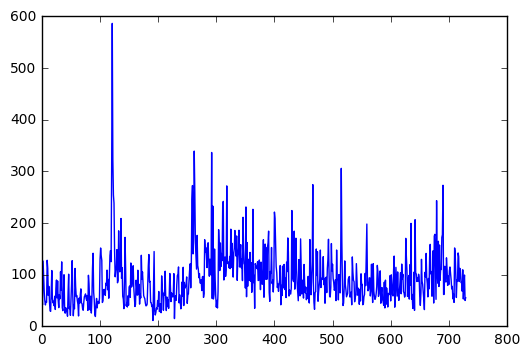

In [590]:
plt.plot(data['epu_idx'])
plt.show()

In [569]:
data.to_csv('btc_all_diff.csv')